In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link= 'https://drive.google.com/file/d/1lW_7vuu2KOwcgCGBrgq-y4ZORPMBmBYu/view?usp=sharing'
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline
import plotly.express as px


# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('chocolate_bars.csv') 
 
df= pd.read_csv('chocolate_bars.csv',index_col='id')
df.head()

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 2454 to 2170
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      2530 non-null   object 
 1   company_location  2530 non-null   object 
 2   year_reviewed     2530 non-null   int64  
 3   bean_origin       2530 non-null   object 
 4   bar_name          2530 non-null   object 
 5   cocoa_percent     2530 non-null   float64
 6   num_ingredients   2443 non-null   float64
 7   ingredients       2443 non-null   object 
 8   review            2530 non-null   object 
 9   rating            2530 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 217.4+ KB


In [4]:
df.describe()

,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2443.000000,2530.000000
mean,2014.374308,71.639723,3.041343,3.196344
std,3.968267,5.616724,0.913728,0.445321
min,2006.000000,42.000000,1.000000,1.000000
25%,2012.000000,70.000000,2.000000,3.000000
50%,2015.000000,70.000000,3.000000,3.250000
75%,2018.000000,74.000000,4.000000,3.500000
max,2021.000000,100.000000,6.000000,4.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [7]:
df["ingredients"].mode()

0    B,S,C
dtype: object

In [8]:
df["ingredients"].fillna(value = "B,S,C", inplace = True)

In [9]:
ni_mean=df['num_ingredients'].mean()
ni_mean

3.0413426115431847

In [10]:
df["num_ingredients"].fillna(value = ni_mean, inplace = True)

In [11]:
df.isna().sum()

manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 2454 to 2170
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      2530 non-null   object 
 1   company_location  2530 non-null   object 
 2   year_reviewed     2530 non-null   int64  
 3   bean_origin       2530 non-null   object 
 4   bar_name          2530 non-null   object 
 5   cocoa_percent     2530 non-null   float64
 6   num_ingredients   2530 non-null   float64
 7   ingredients       2530 non-null   object 
 8   review            2530 non-null   object 
 9   rating            2530 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 217.4+ KB


                PROJECT
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

             💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

1. What is the average rating by country of origin?

In [13]:
One=df.groupby('bean_origin',as_index=False)['rating'].mean().sort_values(by='rating')
One
#convert to DataFrame
df1 = pd.DataFrame(One)
df1

,bean_origin,rating
39,Puerto Rico,2.714286
30,Martinique,2.750000
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
...,...,...
9,Congo,3.318182
44,Solomon Islands,3.450000
42,Sao Tome & Principe,3.500000
7,China,3.500000


2. How many bars were reviewed for each of those countries?

In [14]:
two=df.groupby('bean_origin', as_index=False)['review'].count().sort_values(by='review')
#convert it to DataFrame
df2=pd.DataFrame(two)
df2

,bean_origin,review
30,Martinique,1
38,Principe,1
12,DR Congo,1
47,St.Vincent-Grenadines,1
7,China,1
...,...,...
28,Madagascar,177
14,Ecuador,219
13,Dominican Republic,226
36,Peru,244


3. Create plots to visualize findings for questions 1 and 2.

A

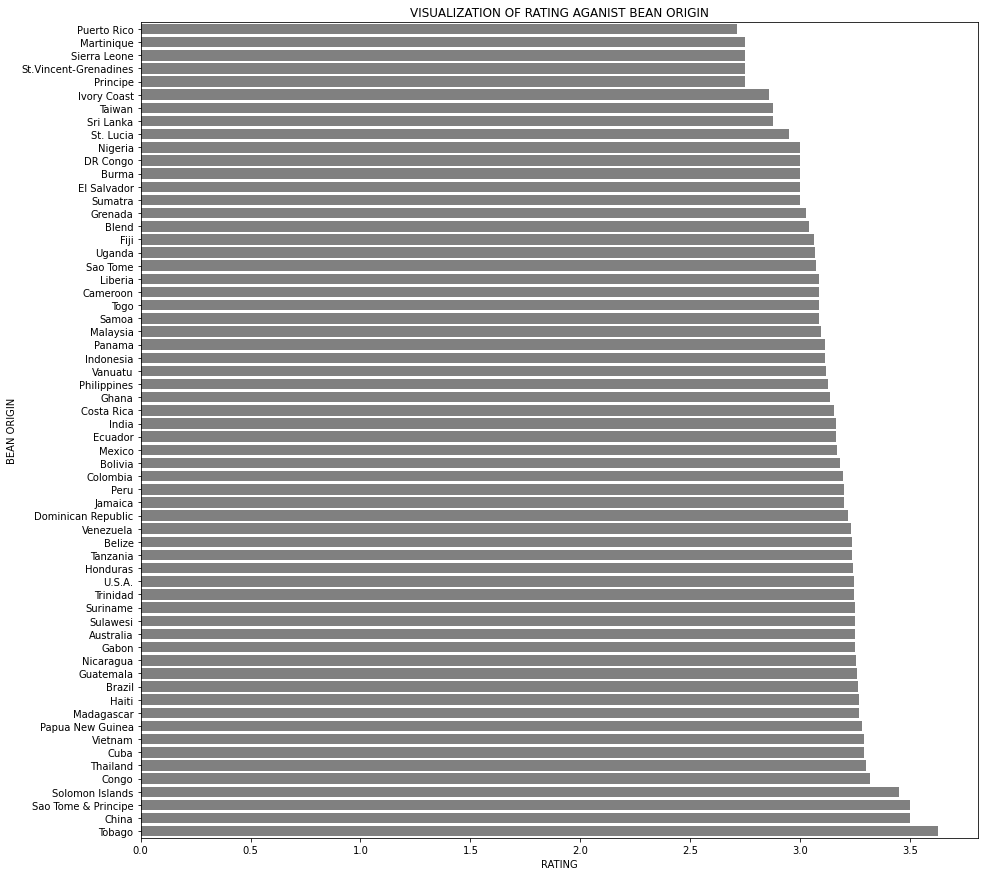

In [23]:
plt.subplots(figsize=(15, 15))
p=sns.barplot(x='rating',y='bean_origin',data=df1, orient="h", color='grey')
p.set(xlabel ="RATING", ylabel = "BEAN ORIGIN", title ='VISUALIZATION OF RATING AGANIST BEAN ORIGIN')
plt.show()


How many bars were reviewed for each of those countries?

In [49]:
#px.subplots(figsize=(15, 15))
fig= px.funnel(df2, x='review', y='bean_origin', 
               labels={'review':'REVIEW', 'bean_origin': 'BEAN ORIGIN'},
               title='Visualization of Review against Bean Origin')
#fig.set(xlabel ="REVIEW", ylabel = "BEAN ORIGIN", title ='VISUALIZATION OF REVIEW AGANIST BEAN ORIGIN')

fig.show()

B

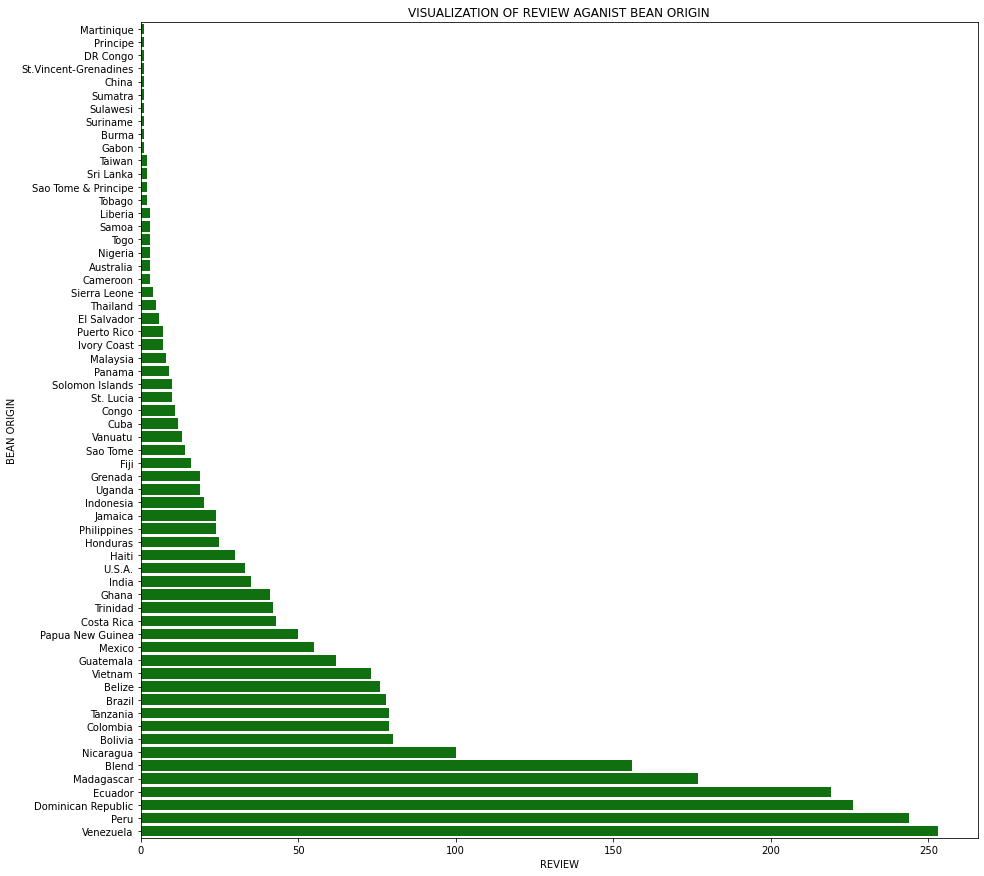

In [50]:
plt.subplots(figsize=(15,15))
q=sns.barplot(x='review',y='bean_origin',data=df2, orient="h", color='green')
q.set(xlabel ="REVIEW", ylabel = "BEAN ORIGIN", title ='VISUALIZATION OF REVIEW AGANIST BEAN ORIGIN')
plt.show()

4. Is the cacao bean's origin an indicator of quality? 

In [117]:
df['bean_origin'].count()=='cocao'

False

Since, cacao bean"s origin can not be found. Therefore, it does not exist in the dataset.

5. How does cocoa content relate to rating? 
What is the average cocoa content for bars with higher ratings (above 3.5)?

A

In [59]:
three=df.groupby('cocoa_percent', as_index=False)['rating'].count()
#convert it to DataFrame
df3=pd.DataFrame(three)
df3

,cocoa_percent,rating
0,42.0,1
1,46.0,1
2,50.0,1
3,53.0,1
4,55.0,16
5,56.0,2
6,57.0,1
7,58.0,8
8,60.0,46
9,60.5,1


Text(0.5, 1.0, 'Correlation Heatmap of Cocoa Percent and Rating')

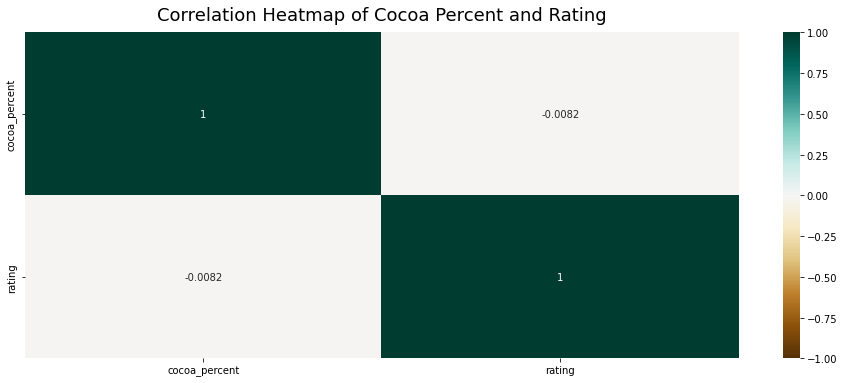

In [76]:
r=sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
r.set_title('Correlation Heatmap of Cocoa Percent and Rating', fontdict={'fontsize':18}, pad=12)

B. What is the average cocoa content for bars with higher ratings (above 3.5)?

In [84]:
#streamline the dataset to participate that have above 3.5 as rating
four=df.loc[df['rating'] > 3.5]
four
#get their average
df4=four.groupby('rating',as_index=False)['cocoa_percent'].mean()
df4

,rating,cocoa_percent
0,3.75,71.041667
1,4.00,70.696429


6. Your research indicates that some consumers want to avoid bars with lecithin. 
Compare the average rating of bars with and without lecithin (L in the ingredients).

In [95]:
df['ingredients'].unique()

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L', 'B,S,V',
       'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa', 'B,S*,V,L', 'B,C',
       'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [ ]:
df.loc[df['ingredients']=='%L%']